In [2]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Sep__8_19:56:38_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.3, V12.3.52
Build cuda_12.3.r12.3/compiler.33281558_0


In [3]:
print("CUDA Available:", torch.cuda.is_available())

CUDA Available: False


In [ ]:
# If CUDA is not available, use CPU
if not torch.cuda.is_available():
    cfg.MODEL.DEVICE = 'cpu'

In [5]:
print(torch.version.cuda)

None


In [6]:
!nvidia-smi


Tue Jan 14 13:45:06 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Quadro K620                  WDDM  | 00000000:01:00.0  On |                  N/A |
| 34%   47C    P0               2W /  30W |    920MiB /  2048MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))  # If there is at least one device


1
Quadro K620


In [1]:
import torch
print(torch.__version__)


2.1.0


In [2]:
import torch
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)


PyTorch Version: 2.1.0
CUDA Available: True
CUDA Version: 11.8


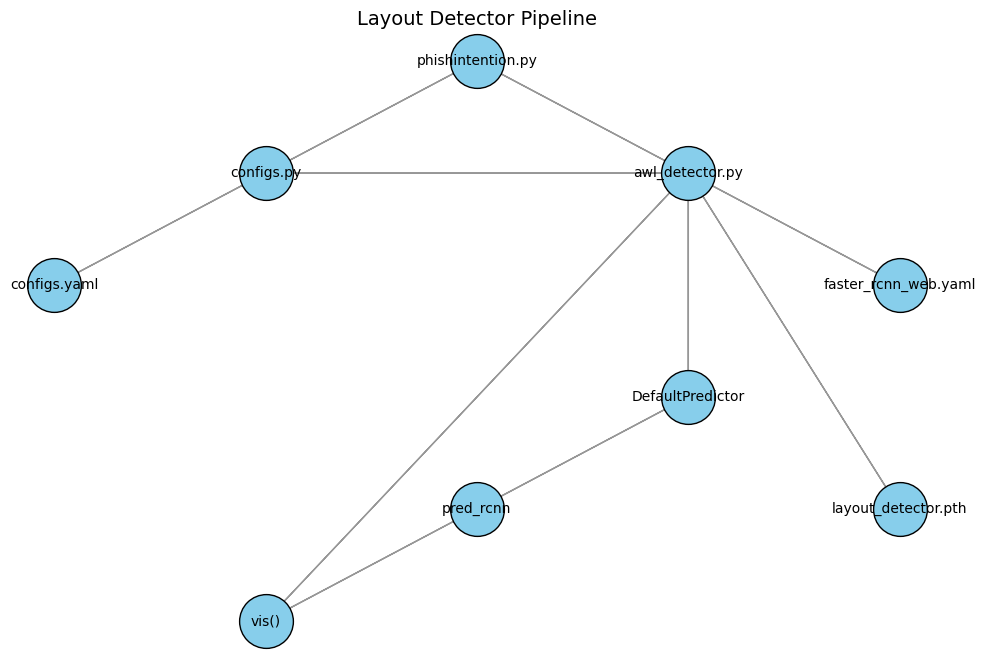

In [6]:
# Simplified retry with matplotlib's visualization only

plt.figure(figsize=(12, 8))

# Nodes and positions for the layout
nodes = {
    "phishintention.py": (0, 2),
    "configs.py": (-2, 1),
    "configs.yaml": (-4, 0),
    "awl_detector.py": (2, 1),
    "faster_rcnn_web.yaml": (4, 0),
    "layout_detector.pth": (4, -2),
    "DefaultPredictor": (2, -1),
    "pred_rcnn": (0, -2),
    "vis()": (-2, -3)
}

edges = [
    ("phishintention.py", "configs.py"),
    ("phishintention.py", "awl_detector.py"),
    ("configs.py", "configs.yaml"),
    ("configs.py", "awl_detector.py"),
    ("awl_detector.py", "faster_rcnn_web.yaml"),
    ("awl_detector.py", "layout_detector.pth"),
    ("awl_detector.py", "DefaultPredictor"),
    ("DefaultPredictor", "pred_rcnn"),
    ("awl_detector.py", "vis()"),
    ("pred_rcnn", "vis()")
]

# Draw nodes
for node, (x, y) in nodes.items():
    plt.scatter(x, y, s=1500, c="skyblue", edgecolors="black", zorder=2)
    plt.text(x, y, node, fontsize=10, ha="center", va="center", zorder=3)

# Draw edges
for start, end in edges:
    start_x, start_y = nodes[start]
    end_x, end_y = nodes[end]
    plt.arrow(
        start_x, start_y, end_x - start_x, end_y - start_y,
        head_width=0.1, length_includes_head=True, color="gray", alpha=0.8, zorder=1
    )

plt.title("Layout Detector Pipeline", fontsize=14)
plt.axis("off")
plt.show()


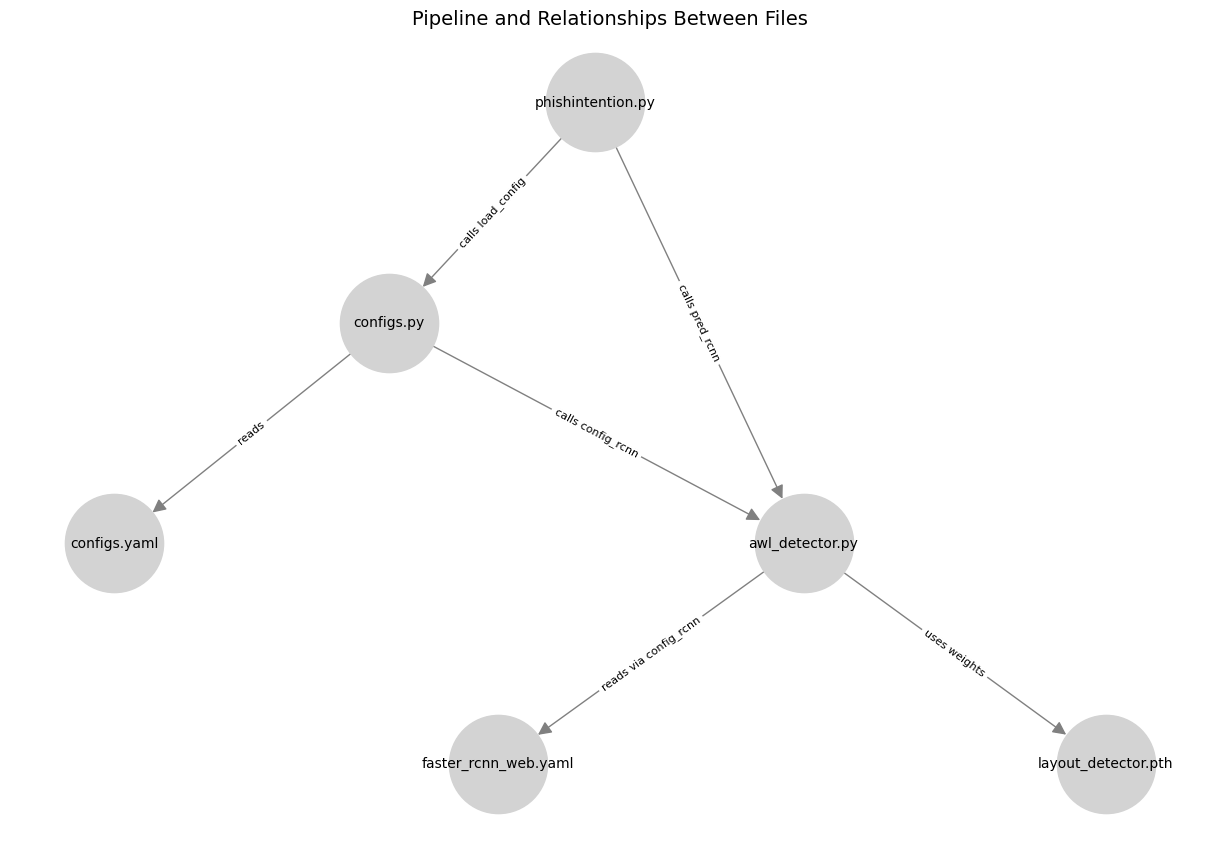

In [1]:
# Redoing the graph representation to ensure compatibility
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define the nodes (files and their roles)
nodes = {
    "phishintention.py": "phishintention.py\n(Entrypoint)",
    "configs.py": "configs.py\n(Configuration Loader)",
    "configs.yaml": "configs.yaml\n(Configuration Data)",
    "awl_detector.py": "awl_detector.py\n(Model Setup & Inference)",
    "faster_rcnn_web.yaml": "faster_rcnn_web.yaml\n(Model Details)",
    "layout_detector.pth": "layout_detector.pth\n(Weights)"
}

# Add the nodes to the graph with their labels
for node, label in nodes.items():
    G.add_node(node, label=label)

# Add the edges (relationships)
edges = [
    ("phishintention.py", "configs.py", "calls load_config"),
    ("phishintention.py", "awl_detector.py", "calls pred_rcnn"),
    ("configs.py", "configs.yaml", "reads"),
    ("configs.py", "awl_detector.py", "calls config_rcnn"),
    ("awl_detector.py", "faster_rcnn_web.yaml", "reads via config_rcnn"),
    ("awl_detector.py", "layout_detector.pth", "uses weights")
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Define the layout for the graph
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos, with_labels=True, node_size=5000, 
    node_color="lightgray", font_size=10, 
    arrowsize=20, edge_color="gray"
)

# Draw edge labels for clarity
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="black", font_size=8)

# Title and display
plt.title("Pipeline and Relationships Between Files", fontsize=14)
plt.show()

